# Otto Group Product Classification Challenge 🛍

## 1. Problem Definition

> How well can we classify future products into one of the main product categories?

## 2. Data

The data is downloaded from [Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge/overview).

Each row corresponds to a single product. There are a total of **93 numerical features**, which **represent counts** of different events. All features have been obfuscated and will not be defined any further.

There are **nine categories** for all products. Each target category represents one of our most important product categories (like fashion, electronics, etc.). The products for the training and testing sets are selected randomly.

### File descriptions
* trainData.csv - the training set
* testData.csv - the test set
* sampleSubmission.csv - a sample submission file in the correct format

### Data fields
* id - an anonymous id unique to a product
* feat_1, feat_2, ..., feat_93 - the various features of a product
* target - the class of a product

## 3. Evaluation

The evaluation for the competition is **multi-class logarithm loss**. See [Kaggle: Evaluation](https://www.kaggle.com/c/otto-group-product-classification-challenge/overview/evaluation).

_Note_: Scikit-learn provides a utility function: [log_Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

## 4. Features

There are 93 numerical features, see 2. Data.

## Imports and Data Exploration

In [0]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# Models from Scikit-Learn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import cross_val_predict, cross_validate, train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, confusion_matrix, precision_score, f1_score, log_loss, recall_score

### Load Data & EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/otto/train.csv')
df_valid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/otto/test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [44]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144368 entries, 0 to 144367
Data columns (total 94 columns):
id         144368 non-null int64
feat_1     144368 non-null int64
feat_2     144368 non-null int64
feat_3     144368 non-null int64
feat_4     144368 non-null int64
feat_5     144368 non-null int64
feat_6     144368 non-null int64
feat_7     144368 non-null int64
feat_8     144368 non-null int64
feat_9     144368 non-null int64
feat_10    144368 non-null int64
feat_11    144368 non-null int64
feat_12    144368 non-null int64
feat_13    144368 non-null int64
feat_14    144368 non-null int64
feat_15    144368 non-null int64
feat_16    144368 non-null int64
feat_17    144368 non-null int64
feat_18    144368 non-null int64
feat_19    144368 non-null int64
feat_20    144368 non-null int64
feat_21    144368 non-null int64
feat_22    144368 non-null int64
feat_23    144368 non-null int64
feat_24    144368 non-null int64
feat_25    144368 non-null int64
feat_26    144368 non-null int6

In [45]:
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


**Note**: Target value is type object (string)

### Convert Target Column into Category

In [0]:
def convert_into_category(df):
    """
    Converts all non-numerical columns of a Pandas
    DataFrame into a categorical type.
    """
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
    return df

In [47]:
convert_into_category(df)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,0,0,1,3,0,0,9,0,2,0,0,0,7,0,3,6,1,0,0,65,1,0,4,3,1,1,1,2,1,0,...,3,1,0,0,0,1,0,22,0,1,4,11,3,0,0,3,0,1,1,2,0,0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,9
61874,61875,4,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,2,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,2,0,0,1,5,0,0,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,2,0,0,2,0,0,1,0,9
61875,61876,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,...,0,0,0,0,19,0,0,4,0,0,0,0,18,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,9
61876,61877,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,1,0,0,1,2,0,0,2,1,0,0,5,0,0,0,...,0,0,1,0,0,0,0,2,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,10,0,9


In [48]:
df.target.value_counts()

2    16122
6    14135
8     8464
3     8004
9     4955
7     2839
5     2739
4     2691
1     1929
Name: target, dtype: int64

#### Visualizations

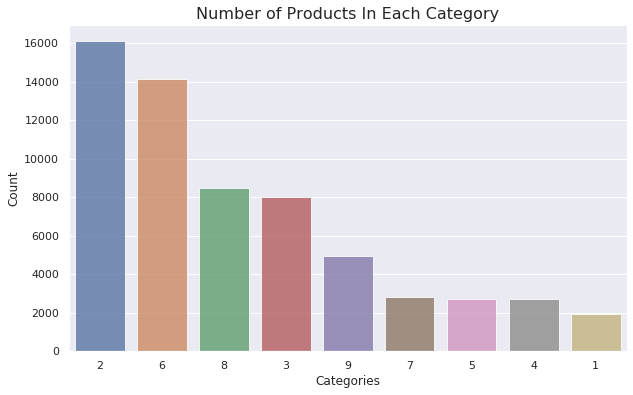

In [49]:
# Plotting a bar chart for the target values
category_count = df.target.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(category_count.index, category_count.values,
            order=category_count.index,
            alpha=0.8)
plt.title('Number of Products In Each Category', fontdict={'fontsize': 16})
plt.ylabel('Count')
plt.xlabel('Categories', fontdict={'fontsize': 12});

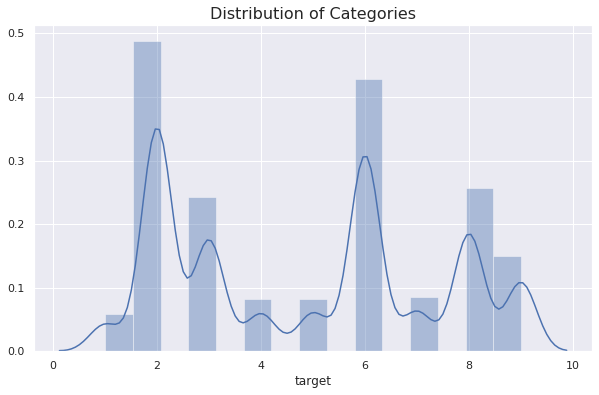

In [50]:
# Visualize distribution

plt.figure(figsize=(10,6))
sns.distplot(df.target, bins=15)
plt.title('Distribution of Categories', fontdict={'fontsize': 16});

In [0]:
# Split into features and label

X = df.drop('target', axis=1)
y = df.target

# Split into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

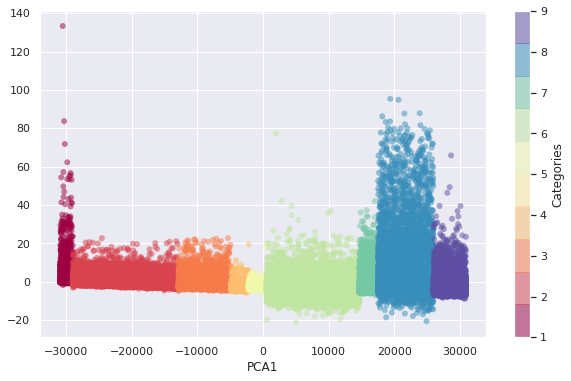

In [52]:
# Visualize dataset with PCA
from sklearn.decomposition import PCA

# instantiate model with 2 dimensions
pca = PCA(2)

# project from 93 to 2 dimensions
projected = pca.fit_transform(df)

# plot
plt.figure(figsize=(10,6))
plt.scatter(projected[:,0], projected[:,1],
            c=df.target, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('Spectral', 10))
plt.xlabel('PCA1')
plt.colorbar(label='Categories');

The full data is a 93-dimensional point cloud. These points are the projection of each data point along the directions with largest variance.

See [Principal Component Analysis (Data Science Handbook)](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

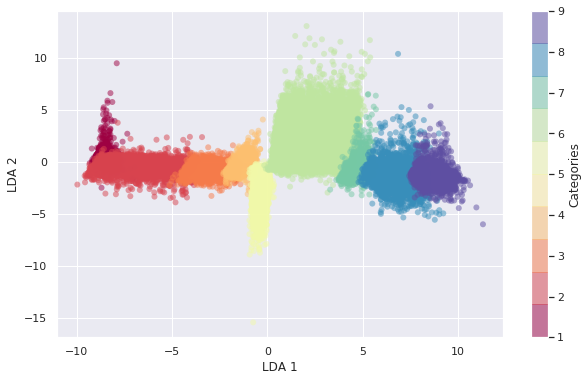

In [53]:
# Visualize dataset with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# instantiate model with 2 dimensions
lda = LinearDiscriminantAnalysis(n_components=2)

# project from 93 to 2 dimensions
projected = lda.fit_transform(X, y)

# plot
plt.figure(figsize=(10,6))
plt.scatter(projected[:,0], projected[:,1],
            c=df.target, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('Spectral', 10))
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.colorbar(label='Categories');

## 5. Data Modelling

### Dimensionality Reduction with PCA

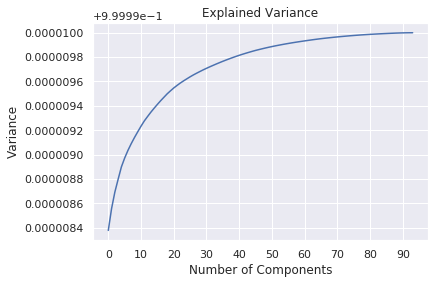

In [54]:
# Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 100, step=10))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance');

**Note**: With 80 components, we preserve almost 100% of the total variance of the data.

In [55]:
# Reduce dimensionality with PCA

# Create PCA
pca = PCA(n_components=80, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

X_train_pca.shape, X_test_pca.shape

((49502, 80), (12376, 80))

### Naive Gaussian Bayes

In [0]:
# Instantiate Gaussian Naive Bayes and fit
naive_bayes_pca_clf = GaussianNB().fit(X_train_pca, y_train)

In [0]:
# Create k-fold cross-validation
skf = StratifiedKFold(n_splits=10,
                      shuffle=True,
                      random_state=42)

# Create a dictionary of scoring metrics
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'log loss': 'neg_log_loss'}

# Create helper function for cross-validated scores
def average_score_on_cross_val_classification(clf, X, y, scoring=scoring, cv=skf):
    """
    Evaluates a given model/estimator using cross-validation
    and returns a dict containing the absolute vlues of the average (mean) scores
    for classification models.

    clf: scikit-learn classification model
    X: features (no labels)
    y: labels
    scoring: a dictionary of scoring metrics
    cv: cross-validation strategy
    """
    # Score metrics on cross-validated dataset
    scores_dict = cross_validate(clf, X, y, scoring=scoring, cv=skf, n_jobs=-1)
    
    # return the average scores for each metric
    return {metric: round(np.mean(scores), 5) for metric, scores in scores_dict.items()}

In [58]:
# Score model
naive_bayes_pca_metrics = average_score_on_cross_val_classification(naive_bayes_pca_clf, X, y)
naive_bayes_pca_metrics

{'fit_time': 0.15779,
 'score_time': 0.1023,
 'test_accuracy': 0.81145,
 'test_f1': 0.80181,
 'test_log loss': -2.13586,
 'test_precision': 0.82919,
 'test_recall': 0.81145}

In [0]:
# Make predictions
y_preds_naive_bayes_pca = naive_bayes_pca_clf.predict(X_test_pca)
y_preds_naive_bayes_proba_pca = naive_bayes_pca_clf.predict_proba(X_test_pca)

In [60]:
# Multi-class log loss on predictions
log_loss(y_test, y_preds_naive_bayes_proba_pca)

18.892941822587655

**Note**: In the competition, the best score was 0.38242!
Naive Gaussian Bayes doesn't do well here!

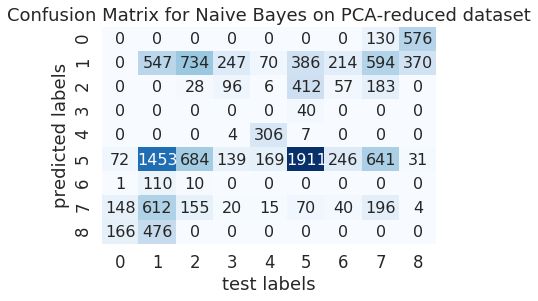

In [61]:
# Confusion Matrix
naive_bayes_pca_conf_mat = confusion_matrix(y_test, y_preds_naive_bayes_pca)

sns.set(font_scale=1.5)
sns.heatmap(naive_bayes_pca_conf_mat.T, annot=True, fmt='d', annot_kws={'size': 16}, cmap='Blues', cbar=False)
plt.xlabel('test labels')
plt.ylabel('predicted labels')
plt.title('Confusion Matrix for Naive Bayes on PCA-reduced dataset');

### Random Forest Classification

In [0]:
# Initialize and fit Random Forest Classifier
rf_pca_clf = RandomForestClassifier().fit(X_train_pca, y_train)

In [63]:
# Show scores
rf_pca_metrics = average_score_on_cross_val_classification(rf_pca_clf, X, y)
rf_pca_metrics

{'fit_time': 13.37975,
 'score_time': 0.37316,
 'test_accuracy': 0.99493,
 'test_f1': 0.99493,
 'test_log loss': -0.14324,
 'test_precision': 0.99494,
 'test_recall': 0.99493}

In [0]:
# Create predictions
y_preds_rf_pca = rf_pca_clf.predict(X_test_pca)
y_preds_rf_proba_pca = rf_pca_clf.predict_proba(X_test_pca)

In [65]:
log_loss(y_test, y_preds_rf_proba_pca)

2.776634205396304

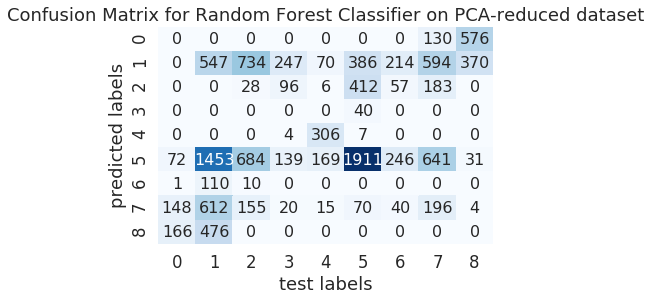

In [66]:
# Confusion Matrix
naive_bayes_pca_conf_mat = confusion_matrix(y_test, y_preds_naive_bayes_pca)

sns.set(font_scale=1.5)
sns.heatmap(naive_bayes_pca_conf_mat.T, annot=True, fmt='d', annot_kws={'size': 16}, cmap='Blues', cbar=False)
plt.xlabel('test labels')
plt.ylabel('predicted labels')
plt.title('Confusion Matrix for Random Forest Classifier on PCA-reduced dataset');

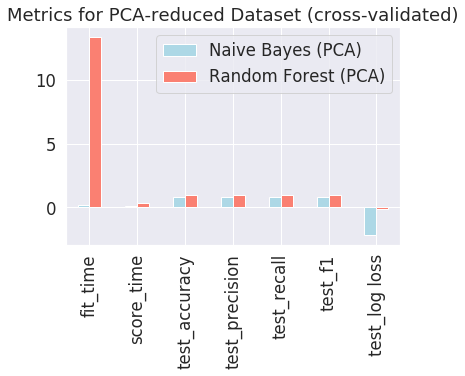

In [67]:
# Visualize cross-validated metrics
compare_metrics_df = pd.DataFrame({'Naive Bayes (PCA)': naive_bayes_pca_metrics,
                                   'Random Forest (PCA)': rf_pca_metrics},
                                  index=naive_bayes_pca_metrics.keys())

compare_metrics_df.plot(title='Metrics for PCA-reduced Dataset (cross-validated)',
                        color=['lightblue', 'salmon'],
                        kind='bar');

### Experiments With Dimensionality Reduction and Feature Selection

#### Linear Discriminant Analysis

Find out how many components are required to get above 0.95 variance threshold.

See also [Chris Albon's notes](https://chrisalbon.com/machine_learning/feature_engineering/lda_for_dimensionality_reduction/).

From [Machine Learning Mastery](https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/):
> Logistic regression is a simple and powerful linear classification algorithm. It also has limitations that suggest at the need for alternate linear classification algorithms.

> * **Two-Class Problems**. Logistic regression is intended for two-class or binary classification problems. It can be extended for multi-class classification, but is rarely used for this purpose.
> * **Unstable With Well Separated Classes**. Logistic regression can become unstable when the classes are well separated.
> * **Unstable With Few Examples**. Logistic regression can become unstable when there are few examples from which to estimate the parameters.

> Linear Discriminant Analysis does address each of these points and is the go-to linear method for multi-class classification problems. Even with binary-classification problems, it is a good idea to try both logistic regression and linear discriminant analysis.

In [0]:
# Standardize features
X_train_std = StandardScaler().fit_transform(X_train)

In [0]:
# Create and fit LDA
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(X_train_std, y_train)

# Create array of explained variance rations
lda_var_ratios = lda.explained_variance_ratio_

In [0]:
# Function for selecting n components
def select_n_lda_components(var_ratio, goal_var):
    # Set initial variance
    total_variance = 0.0
    # Set initial number of components
    n_components = 0
    # loop
    for explained_variance in var_ratio:
        # Add explained variance to total
        total_variance += explained_variance
        # Increment number of components
        n_components += 1
        # Stop loop if goal level of explained variance is met
        if total_variance >= goal_var:
            break
    
    return n_components

In [71]:
lda_components = select_n_lda_components(lda_var_ratios, 0.95)
lda_components

4

#### Truncated Singular Value Decomposition (TSVD)

The dataset shows that this challenge provides a **sparse feature matrix**.

_Truncated SVD_ is an ideal candidate:

From the [sci-kit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html):

> This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently

See also [Chris Albon's notes](https://chrisalbon.com/machine_learning/feature_engineering/dimensionality_reduction_on_sparse_feature_matrix/).

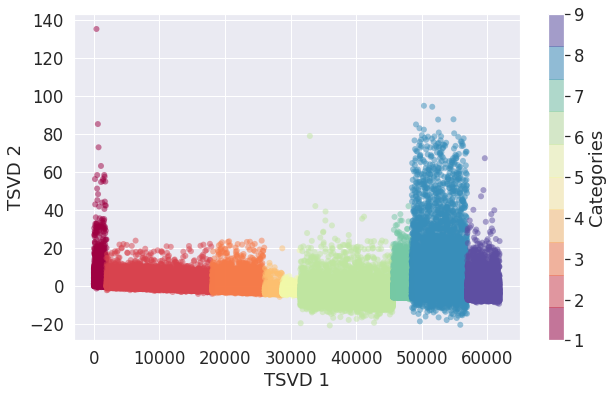

In [79]:
# Visualize dataset with TSDV

# instantiate model with 2 dimensions
tsvd = TruncatedSVD(n_components=2)

# project from 93 to 2 dimensions
projected = tsdv.fit_transform(X, y)

# plot
plt.figure(figsize=(10,6))
plt.scatter(projected[:,0], projected[:,1],
            c=df.target, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('Spectral', 10))
plt.xlabel('TSVD 1')
plt.ylabel('TSVD 2')
plt.colorbar(label='Categories');

In [0]:
# Create and run TSVD with one less than number of (sparse) features
tsvd = TruncatedSVD(n_components=X_train_std.shape[1]-1)
features_tsvd = tsvd.fit(X_train)

# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [0]:
# Create a function
def select_n_tsvd_components(var_ratio, goal_var):
    # Set initial variance
    total_variance = 0.0
    # Set initial number of components
    n_components = 0
    # loop
    for explained_variance in var_ratio:
        # Add explained variance to total
        total_variance += explained_variance
        # Increment number of components
        n_components += 1
        # Stop loop if goal level of explained variance is met
        if total_variance >= goal_var:
            break
    
    return n_components 

In [11]:
tsvd_components = select_n_tsvd_components(tsvd_var_ratios, 0.95)
tsvd_components

1

### Create Pipeline And Compare Three Different Models

In [0]:
# Create features union
# Standardizes feature matrix, uses TSVD, then selects 6 best features
features = []
features.append(('standardize', StandardScaler()))
features.append(('tsvd', TruncatedSVD(n_components=tsvd_components)))
feature_union = FeatureUnion(features)

In [0]:
# Create pipeline
# combines feature union with scikit-learn estimator

# Logistic Regression
estimators_log_r =  []
estimators_log_r.append(('feature_union', feature_union))
estimators_log_r.append(('logistic', LogisticRegression(random_state=42)))
model_log_r = Pipeline(estimators_log_r)

# SVC
estimators_svc = []
estimators_svc.append(('feature_union', feature_union))
estimators_svc.append(('svc', SVC(probability=True, random_state=42)))
model_svc = Pipeline(estimators_svc)

# Random Forest
estimators_rf = []
estimators_rf.append(('feature_union', feature_union))
estimators_rf.append(('rf', RandomForestClassifier(n_jobs=-1, random_state=42)))
model_rf = Pipeline(estimators_rf)

models = {'Logistic_Regression': model_log_r,
          'SVC': model_svc,
          'Random_Forest_C': model_rf}

In [85]:
# Run and score all models
np.random.seed(42)
scores = {name: average_score_on_cross_val_classification(model, X, y) for name, model in models.items()}
scores

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'Logistic_Regression': {'fit_time': 10.89754,
  'score_time': 0.04632,
  'test_accuracy': 0.80743,
  'test_f1': 0.78701,
  'test_log loss': -0.66883,
  'test_precision': 0.80558,
  'test_recall': 0.80743},
 'Random_Forest_C': {'fit_time': 11.40841,
  'score_time': 0.45003,
  'test_accuracy': 0.99945,
  'test_f1': 0.99945,
  'test_log loss': -0.06393,
  'test_precision': 0.99945,
  'test_recall': 0.99945},
 'SVC': {'fit_time': 200.75772,
  'score_time': 28.49655,
  'test_accuracy': 0.99911,
  'test_f1': 0.99911,
  'test_log loss': -0.01378,
  'test_precision': 0.99912,
  'test_recall': 0.99911}}

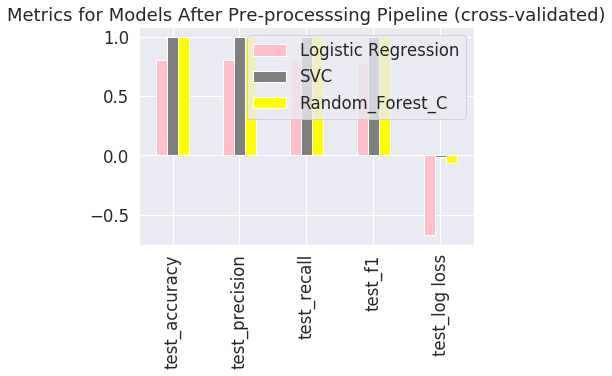

In [86]:
# Visualize cross-validated metrics

# Create DataFrame with all scores
compare_pipeline_metrics_df = pd.DataFrame({'Logistic Regression': scores['Logistic_Regression'],
                                            'SVC': scores['SVC'],
                                            'Random_Forest_C': scores['Random_Forest_C']},
                                            index=scores['SVC'].keys())

# Drop rows: fit_time, score_time
compare_pipeline_metrics_df.drop(['fit_time', 'score_time'], inplace=True)

compare_pipeline_metrics_df.plot(title='Metrics for Models After Pre-processsing Pipeline (cross-validated)',
                        color=['pink', 'gray', 'yellow'],
                        kind='bar');

### Explore Support Vector Machine

In [0]:
# Create features pipeline
features = []
features.append(('standardize', StandardScaler()))
features.append(('tsvd', TruncatedSVD(n_components=tsvd_components, random_state=42)))
feature_union = FeatureUnion(features)

In [13]:
# Create SVC pipeline
estimators_svc = []
estimators_svc.append(('feature_union', feature_union))
estimators_svc.append(('svc', SVC(class_weight='balanced', probability=True, random_state=42)))

svc_model = Pipeline(estimators_svc)
svc_model

Pipeline(memory=None,
         steps=[('feature_union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('standardize',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('tsvd',
                                                 TruncatedSVD(algorithm='randomized',
                                                              n_components=1,
                                                              n_iter=5,
                                                              random_state=42,
                                                              tol=0.0))],
                              transformer_weights=None, verbose=False)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=2

In [14]:
# Fit model
svc_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('feature_union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('standardize',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('tsvd',
                                                 TruncatedSVD(algorithm='randomized',
                                                              n_components=1,
                                                              n_iter=5,
                                                              random_state=42,
                                                              tol=0.0))],
                              transformer_weights=None, verbose=False)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=2

In [0]:
# Make predictions
y_preds_svc = svc_model.predict(X_test)
y_preds_proba_svc = svc_model.predict_proba(X_test)

In [16]:
# Multi-class logarithmic loss
log_loss(y_test, y_preds_proba_svc)

0.015123913549914424

**Note**: The model scores significantly better than the winner in the original competition.
It's been 5 years, so did sci-kit learn get so much better or is something wrong here?

In [0]:
# Check cross-validated scores again
svc_model_scores = average_score_on_cross_val_classification(svc_model, X, y)

In [18]:
svc_model_scores

{'fit_time': 232.48821,
 'score_time': 31.26159,
 'test_accuracy': 0.94397,
 'test_f1': 0.94612,
 'test_log loss': -0.01377,
 'test_precision': 0.95512,
 'test_recall': 0.94397}

In [0]:
# Create dataframe from dictionary, drop fit_time and score_time
svc_model_scores_df = pd.DataFrame(svc_model_scores, index=['SVC']).T
svc_model_scores_df.drop(['fit_time', 'score_time'], inplace=True)

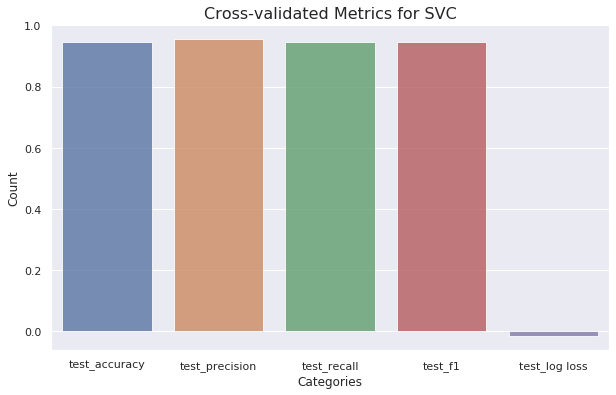

In [20]:
# Visualize scores
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=svc_model_scores_df.index,
            y=svc_model_scores_df['SVC'],
            alpha=0.8)
ax.set_title('Cross-validated Metrics for SVC', fontdict={'fontsize': 16})
ax.set_ylabel('Count')
ax.set_xlabel('Categories', fontdict={'fontsize': 12});

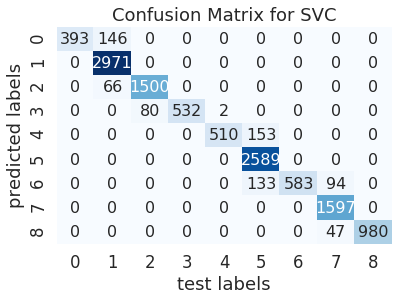

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds_svc)

sns.set(font_scale=1.5)
sns.heatmap(conf_mat.T, annot=True, fmt='d', annot_kws={'size': 16}, cmap='Blues', cbar=False)
plt.xlabel('test labels')
plt.ylabel('predicted labels')
plt.title('Confusion Matrix for SVC');

**Note**: The confusion matrix suggests that the model really does a good job on predicting the correct shopping category _on the training set_.

**Note**: Cross-validation reduces the risk of over-fitting, but it doesn't eliminate it completely. Does the model overfit?  
I have access to the test data from the competition, but no access to the real labels, so I can't check how the model performs on data that it hasn't seen yet.

### Save model

In [0]:
import pickle

# Save model
pickle.dump(svc_model, open('/content/drive/My Drive/Colab Notebooks/models/kaggle-otto-model-1.pkl', 'wb'))

## Make Predictions On Test Data

In [81]:
svc_model.classes_

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [0]:
y_preds = svc_model.predict(df_valid)
y_preds_proba = svc_model.predict_proba(df_valid)

In [50]:
# Take a look at sample submission file
sample_submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/otto/sampleSubmission.csv')
sample_submission.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0


In [53]:
# Create submission DataFrame
predictions = pd.DataFrame(y_preds_proba,
                           columns=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9'],
                           index=df_valid.id)
predictions.reset_index()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.999216,0.000002,0.000169,0.000142,0.000114,0.000097,0.000097,0.000084,0.000078
1,2,0.999216,0.000002,0.000169,0.000142,0.000114,0.000097,0.000097,0.000084,0.000078
2,3,0.999216,0.000002,0.000169,0.000142,0.000114,0.000097,0.000097,0.000084,0.000078
3,4,0.999215,0.000002,0.000169,0.000142,0.000114,0.000097,0.000097,0.000084,0.000078
4,5,0.999215,0.000002,0.000169,0.000143,0.000114,0.000098,0.000097,0.000084,0.000078
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0.068205,0.168950,0.094248,0.085177,0.083379,0.161104,0.057198,0.136894,0.144845
144364,144365,0.068205,0.168949,0.094247,0.085176,0.083378,0.161104,0.057197,0.136902,0.144840
144365,144366,0.068205,0.168948,0.094247,0.085176,0.083378,0.161104,0.057196,0.136911,0.144836
144366,144367,0.068204,0.168947,0.094246,0.085176,0.083377,0.161104,0.057195,0.136919,0.144831


In [0]:
# Save predictions to Google Drive
predictions.to_csv('/content/drive/My Drive/Colab Notebooks/data/otto/submit.csv')

**Note**:  
I did a late submission with the above predictions. The score is around 8.28.
That's far away from the winning score of 0.38.

I guess that my model is overfitting. Or did I make a mistake when compiling the predictions into a csv file?